In [12]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

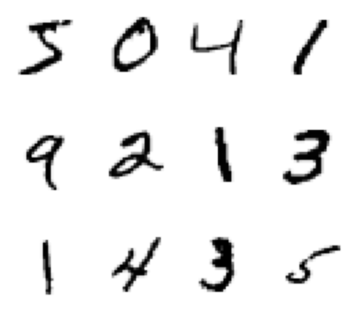

In [17]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(x_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
x_valid.shape

(10000, 28, 28)

In [19]:
y_valid.shape

(10000,)

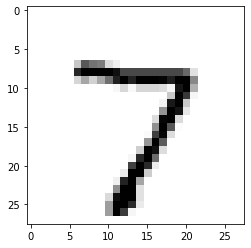

In [20]:
plt.imshow(x_valid[0], cmap='Greys')

In [21]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
y_valid[0]

7

#### Preprocess data

In [24]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_valid = x_valid.reshape(10000, 784).astype('float32')

In [25]:
x_train /= 255
x_valid /= 255

In [26]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
n_classes = 10
y_train = to_categorical(y_train,n_classes)
y_valid = to_categorical(y_valid,n_classes)

In [29]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design Neural Network Architecture

In [30]:
model = Sequential()
#hidden layer
model.add(Dense(64, activation='sigmoid', input_shape =(784,)))
#Output layer
model.add(Dense(10, activation='softmax'))

W0525 12:31:45.583066 11824 deprecation.py:506] From C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


####  Compile model

In [32]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics = ['accuracy'])

#### Train

In [33]:
model.fit(x_train, y_train, batch_size= 128, epochs=200, verbose=1, validation_data=(x_valid,y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0926 - acc: 0.0987 - val_loss: 0.0914 - val_acc: 0.0959
Epoch 2/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0908 - acc: 0.1002 - val_loss: 0.0904 - val_acc: 0.1013
Epoch 3/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0901 - acc: 0.1260 - val_loss: 0.0899 - val_acc: 0.1548
Epoch 4/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0896 - acc: 0.1845 - val_loss: 0.0894 - val_acc: 0.1995
Epoch 5/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0892 - acc: 0.2194 - val_loss: 0.0890 - val_acc: 0.2261
Epoch 6/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0889 - acc: 0.2410 - val_loss: 0.0887 - val_acc: 0.2452
Epoch 7/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0885 - acc: 0.2574 - val_l

60000/60000 [==============================] - 1s 13us/sample - loss: 0.0664 - acc: 0.5493 - val_loss: 0.0658 - val_acc: 0.5510
Epoch 59/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0660 - acc: 0.5534 - val_loss: 0.0654 - val_acc: 0.5545
Epoch 60/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0655 - acc: 0.5577 - val_loss: 0.0649 - val_acc: 0.5597
Epoch 61/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0650 - acc: 0.5621 - val_loss: 0.0644 - val_acc: 0.5643
Epoch 62/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0645 - acc: 0.5667 - val_loss: 0.0639 - val_acc: 0.5683
Epoch 63/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0641 - acc: 0.5707 - val_loss: 0.0635 - val_acc: 0.5732
Epoch 64/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0636 - acc: 0.5749 - val_loss: 0.0630 - val_acc: 0.5771
Epoch 65/200
60000/60000 [

60000/60000 [==============================] - 1s 13us/sample - loss: 0.0440 - acc: 0.7617 - val_loss: 0.0431 - val_acc: 0.7706
Epoch 117/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0437 - acc: 0.7636 - val_loss: 0.0428 - val_acc: 0.7730
Epoch 118/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0434 - acc: 0.7656 - val_loss: 0.0425 - val_acc: 0.7759
Epoch 119/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0431 - acc: 0.7674 - val_loss: 0.0422 - val_acc: 0.7777
Epoch 120/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0429 - acc: 0.7692 - val_loss: 0.0419 - val_acc: 0.7790
Epoch 121/200
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0426 - acc: 0.7711 - val_loss: 0.0417 - val_acc: 0.7813
Epoch 122/200
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0423 - acc: 0.7729 - val_loss: 0.0414 - val_acc: 0.7834
Epoch 123/200
60000/

60000/60000 [==============================] - 1s 12us/sample - loss: 0.0318 - acc: 0.8407 - val_loss: 0.0308 - val_acc: 0.8492
Epoch 174/200
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0317 - acc: 0.8416 - val_loss: 0.0307 - val_acc: 0.8496
Epoch 175/200
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0315 - acc: 0.8422 - val_loss: 0.0305 - val_acc: 0.8496
Epoch 176/200
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0314 - acc: 0.8430 - val_loss: 0.0304 - val_acc: 0.8503
Epoch 177/200
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0313 - acc: 0.8437 - val_loss: 0.0302 - val_acc: 0.8506
Epoch 178/200
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0311 - acc: 0.8441 - val_loss: 0.0301 - val_acc: 0.8510
Epoch 179/200
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0310 - acc: 0.8447 - val_loss: 0.0299 - val_acc: 0.8518
Epoch 180/200
60000/

In [34]:
model.evaluate(x_valid, y_valid)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0274 - acc: 0.8641


[0.02736147652864456, 0.8641]

####  Performing Inference

In [35]:
valid_0 = x_valid[0].reshape(1, 784)

In [37]:
model.predict(valid_0)

array([[4.2706025e-03, 1.1176901e-03, 4.3637753e-03, 7.0807221e-03,
        6.1808056e-03, 5.1073828e-03, 8.5387455e-04, 9.3296069e-01,
        3.8862368e-03, 3.4178119e-02]], dtype=float32)

In [38]:
model.predict_classes(valid_0)

array([7], dtype=int64)